In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import joblib

In [3]:
# Load the initial dataset
data = pd.read_csv("CustomerSegmentation_dataa.csv")

# Preprocess the data
numerical_features = ['Age', 'Income', 'PurchaseFrequency', 'AverageOrderValue', 'TotalSpend', 'ChurnRisk']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_features])

# Train K-Means model
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)

# Save the model and scaler
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")
data


,CustomerID,Age,Gender,Income,Location,LastPurchaseDate,PurchaseFrequency,AverageOrderValue,TotalSpend,ChurnRisk
0,1000,59,Male,24204,Rural,36:52.3,2,20,1353,91
1,1001,19,Male,95666,Urban,36:52.3,3,139,4580,29
2,1002,23,Male,49270,Rural,36:52.3,1,39,2876,84
3,1003,39,Female,197963,Suburban,36:52.3,10,248,24137,3
4,1004,36,Male,23450,Rural,36:52.3,2,30,1355,50
...,...,...,...,...,...,...,...,...,...,...
995,1995,27,Male,22533,Rural,36:52.3,2,47,2409,80
996,1996,46,Male,121824,Rural,36:52.3,11,168,25597,12
997,1997,64,Female,33240,Urban,36:52.3,2,74,1613,93
998,1998,57,Male,101263,Urban,36:52.3,7,298,10997,8


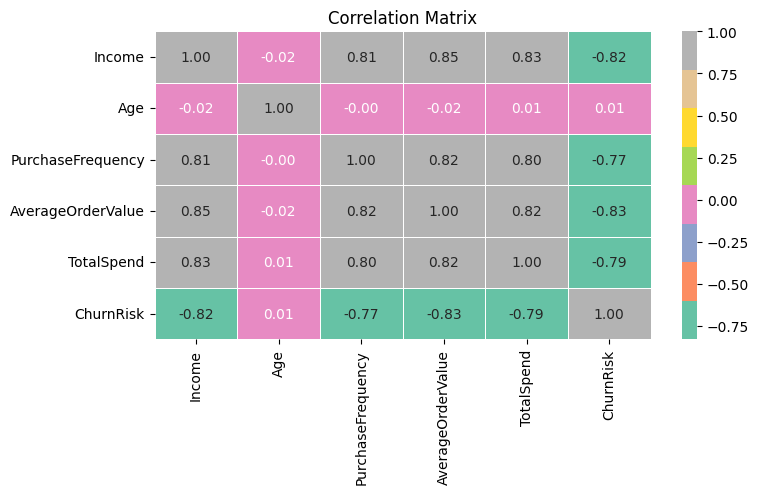

C:\Users\Swarupa\AppData\Local\Temp\ipykernel_17836\228698148.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Income', data=data, palette='Set2')


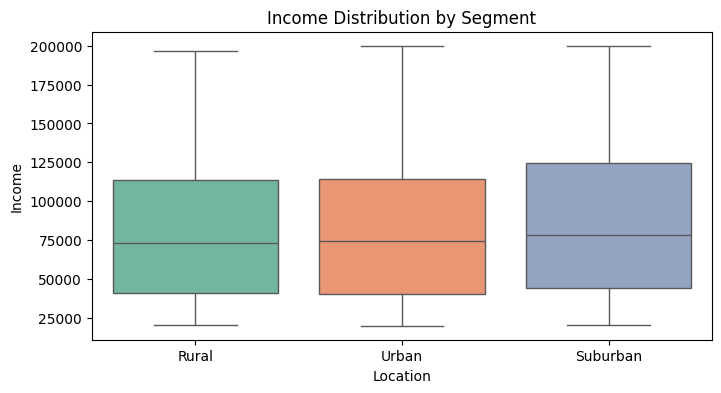

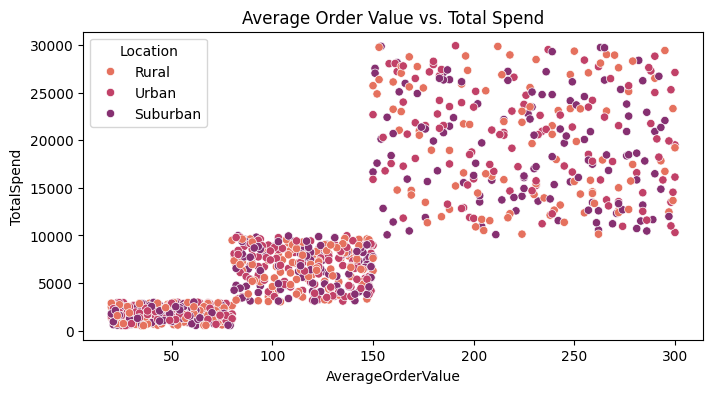

In [6]:
# Correlation Matrix (Heatmap)
corr = data[['Income', 'Age', 'PurchaseFrequency', 'AverageOrderValue', 'TotalSpend', 'ChurnRisk']].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='Set2', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 2. Income Distribution by location (Box Plot)
plt.figure(figsize=(8, 4))
sns.boxplot(x='Location', y='Income', data=data, palette='Set2')
plt.title('Income Distribution by Segment')
plt.show()

# 3. Average Order Value vs. Total Spend (Scatter Plot)
plt.figure(figsize=(8, 4))
sns.scatterplot(x='AverageOrderValue', y='TotalSpend', hue='Location', data=data, palette='flare')
plt.title('Average Order Value vs. Total Spend')
plt.show()

In [8]:
data_scaled = scaler.transform(data[numerical_features])
cluster_labels = {0: 'Basic Customer', 1: 'Premium Customer', 2: 'Deluxe Customer'}
data['Cluster'] = kmeans.predict(data_scaled)

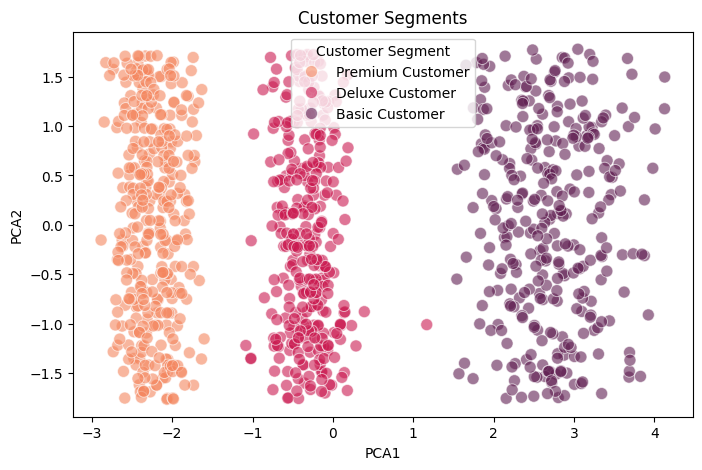

In [9]:
# Reduce dimensions for visualization
data['Customer Segment'] = data['Cluster'].map(cluster_labels)
pca = PCA(n_components=2)
data['PCA1'], data['PCA2'] = zip(*pca.fit_transform(data_scaled))

plt.figure(figsize=(8, 5))
sns.scatterplot(x="PCA1", y="PCA2", hue="Customer Segment", data=data, palette="rocket_r", alpha=0.6, s=75)
plt.title("Customer Segments")

plt.show()